In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



pd.set_option("display.max_colwidth", None) # Show full column width

In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/zeerau/TDI_Projects/main/Data%20Cleaning/wekk10/parsed_job_data.csv',sep=';', on_bad_lines='warn')
df.head(2)

Job_title                Company_name    Location  \
0  Data Engineer Flink  Egrove Systems Corporation  Dallas, TX   
1        Data Engineer          Overstock.com Inc.      Remote   

                                Salary_fork Rating  \
0  Employer Provided Salary:$51.83 Per Hour    4.4   
1     Employer Provided Salary:$87K - $108K    3.1   

                                                                                                                                                                                                                     Company_Overview  \
0                Company Overview\nSize\n51 to 200 Employees\nType\nCompany - Private\nIndustry\nInternet & Web Services\nSector\nInformation Technology\nRevenue\nUnknown / Non-Applicable\nVisit Egrove Systems Corporation Website   
1  Company Overview\nSize\n1001 to 5000 Employees\nFounded\n1999\nType\nCompany - Public\nIndustry\nHome Furniture & Housewares Stores\nSector\nRetail & Wholesale\nRevenue\n$1 to $5 billion (USD)\nVisit Overstock.com Inc. Website   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [5]:
df = df.drop_duplicates()

In [6]:
df.isna().sum()

,0
Job_title,0
Company_name,0
Location,1
Salary_fork,0
Rating,0
Company_Overview,0
Job_description,5
Avg_base_salary,0


In [7]:
df.dropna(inplace=True)

<ipython-input-7-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [8]:
import re

def extract_digits(text):
    """Extracts digits from a string using regex.

    Args:
    text: The input string.

    Returns:
    A string containing only the extracted digits.
    """

    match = re.findall(r'\d+', text)
    return ''.join(match)

# Example usage with your dataframe:
df['Min_No_of_employees'] = df['Company_Overview'].str.split(' ').str.get(1).apply(lambda x: extract_digits(str(x))if x is not None else '') # Assuming 'Company_Overview' column exists

<ipython-input-8-93bdb5a23dad>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Min_No_of_employees'] = df['Company_Overview'].str.split(' ').str.get(1).apply(lambda x: extract_digits(str(x))if x is not None else '') # Assuming 'Company_Overview' column exists


In [9]:
df['Min_No_of_employees']

,Min_No_of_employees
0,51
1,1001
2,201
3,51
4,1001
...,...
3761,1001
3762,1001
3763,10000
3764,501


In [10]:
df['Company_Overview'] = df['Company_Overview'].str.strip('Industry')
df['Company_Overview']

<ipython-input-10-c6c8b1567430>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company_Overview'] = df['Company_Overview'].str.strip('Industry')


,Company_Overview
0,Company Overview\nSize\n51 to 200 Employees\nType\nCompany - Private\nIndustry\nInternet & Web Services\nSector\nInformation Technology\nRevenue\nUnknown / Non-Applicable\nVisit Egrove Systems Corporation Website
1,Company Overview\nSize\n1001 to 5000 Employees\nFounded\n1999\nType\nCompany - Public\nIndustry\nHome Furniture & Housewares Stores\nSector\nRetail & Wholesale\nRevenue\n$1 to $5 billion (USD)\nVisit Overstock.com Inc. Website
2,Company Overview\nSize\n201 to 500 Employees\nType\nSubsidiary or Business Segment\nIndustry\nMetal & Mineral Manufacturing\nSector\nManufacturing\nRevenue\n$100 to $500 million (USD)\nVisit Nucor Business Technology Website
3,Company Overview\nSize\n51 to 200 Employees\nFounded\n2016\nType\nCompany - Private\nIndustry\nEnterprise Software & Network Solutions\nSector\nInformation Technology\nRevenue\nUnknown / Non-Applicable\nVisit Kagr Llc Website
4,Company Overview\nSize\n1001 to 5000 Employees\nFounded\n1925\nType\nCompany - Private\nIndustry\nFood & Beverage Manufacturing\nSector\nManufacturing\nRevenue\n$500 million to $1 billion (USD)\nVisit G&J Pepsi-Cola Bottlers Website
...,...
3761,Company Overview\nSize\n1001 to 5000 Employees\nFounded\n2002\nType\nCompany - Public\nIndustry\nInformation Technology Support Services\nSector\nInformation Technology\nRevenue\n$500 million to $1 billion (USD)\nVisit Roku Website
3762,Company Overview\nSize\n1001 to 5000 Employees\nFounded\n1983\nType\nCompany - Public\nIndustry\nInvestment & Asset Management\nSector\nFinancial Services\nRevenue\n$1 to $5 billion (USD)\nVisit WEX Inc. Website
3763,Company Overview\nSize\n10000+ Employees\nFounded\n1945\nType\nHospital\nIndustry\nHealth Care Services & Hospitals\nSector\nHealthcare\nRevenue\nUnknown / Non-Applicable\nVisit UAB Medicine - UA Health Services Foundation (UAHSF) Website
3764,Company Overview\nSize\n501 to 1000 Employees\nFounded\n1987\nType\nNonprofit Organization\nIndustry\nInsurance Carriers\nSector\nInsurance\nRevenue\n$25 to $100 million (USD)\nVisit UCare Website


In [11]:
df['Industry_Type'] = ''  # Create a new column to store the results

for index, row in df.iterrows():
    text = row['Company_Overview']

    match = re.search(r"Industry\n(.*)\nSector", text)
    if match:
        industry_type = match.group(1).strip()
        df.loc[index, 'Industry_Type'] = industry_type  # Assign the value to the new column
    else:
        df.loc[index, 'Industry_Type'] = "Not Found"  # Handle cases where no match is found

# Now the 'Industry_Type' column in your DataFrame will contain the extracted industry types.

df['Industry_Type']

<ipython-input-11-44c867e358d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Industry_Type'] = ''  # Create a new column to store the results


,Industry_Type
0,Internet & Web Services
1,Home Furniture & Housewares Stores
2,Metal & Mineral Manufacturing
3,Enterprise Software & Network Solutions
4,Food & Beverage Manufacturing
...,...
3761,Information Technology Support Services
3762,Investment & Asset Management
3763,Health Care Services & Hospitals
3764,Insurance Carriers


In [12]:
df['founded_year'] = ''  # Create a new column to store the results

for index, row in df.iterrows():
    text = row['Company_Overview']

    match = re.search(r"Founded\n(.*)\nType", text)
    if match:
        founded_year = match.group(1).strip()
        df.loc[index, 'founded_year'] = founded_year  # Assign the value to the new column
    else:
        df.loc[index, 'founded_year'] = "Not Found"  # Handle cases where no match is found

# Now the 'Industry_Type' column in your DataFrame will contain the extracted industry types.

df['founded_year']

,founded_year
0,Not Found
1,1999
2,Not Found
3,2016
4,1925
...,...
3761,2002
3762,1983
3763,1945
3764,1987


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 0 to 3765
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Job_title            1189 non-null   object
 1   Company_name         1189 non-null   object
 2   Location             1189 non-null   object
 3   Salary_fork          1189 non-null   object
 4   Rating               1189 non-null   object
 5   Company_Overview     1189 non-null   object
 6   Job_description      1189 non-null   object
 7   Avg_base_salary      1189 non-null   object
 8   Min_No_of_employees  1189 non-null   object
 9   Industry_Type        1189 non-null   object
 10  founded_year         1189 non-null   object
dtypes: object(11)
memory usage: 143.8+ KB


In [14]:
df['Salary_fork']

,Salary_fork
0,Employer Provided Salary:$51.83 Per Hour
1,Employer Provided Salary:$87K - $108K
2,$67K - $86K (Glassdoor est.)
3,$70K - $98K (Glassdoor est.)
4,$65K - $96K (Glassdoor est.)
...,...
3761,Employer Provided Salary:$93K - $250K
3762,Employer Provided Salary:$123K - $164K
3763,$74K - $108K (Glassdoor est.)
3764,$104K - $143K (Glassdoor est.)


In [15]:
def extract_salary_digits(salary_fork):
    """Extracts digits from the 'Salary_fork' column using regex.

    Args:
        salary_fork: The salary information string.

    Returns:
        A list of extracted digits.
    """
    digits = re.findall(r'\d+', salary_fork)
    return digits

# Apply the function to the 'Salary_fork' column and store the results in a new column 'Salary_Digits'
df['Salary_Digits'] = df['Salary_fork'].apply(extract_salary_digits)

In [16]:
df['Salary_Digits']

,Salary_Digits
0,"[51, 83]"
1,"[87, 108]"
2,"[67, 86]"
3,"[70, 98]"
4,"[65, 96]"
...,...
3761,"[93, 250]"
3762,"[123, 164]"
3763,"[74, 108]"
3764,"[104, 143]"


In [17]:
df.columns

Index(['Job_title', 'Company_name', 'Location', 'Salary_fork', 'Rating',
       'Company_Overview', 'Job_description', 'Avg_base_salary',
       'Min_No_of_employees', 'Industry_Type', 'founded_year',
       'Salary_Digits'],
      dtype='object')

In [18]:

def extract_salary_digits(salary_fork):
    """Extracts digits from the 'Salary_fork' column using regex."""
    digits = re.findall(r'\d+', salary_fork)
    return digits

def calculate_average_salary(row):
    """Calculates the average salary from the extracted digits."""
    digits = row['Salary_Digits']
    if digits and len(digits) >= 2:  # Check if digits exist and at least 2 values are present
        try:
            lower_bound = int(digits[0]) * 1000  # Assuming 'K' represents thousands
            upper_bound = int(digits[1]) * 1000
            return (lower_bound + upper_bound) / 2  # Calculate average
        except ValueError:
            return np.nan  # Handle potential errors in converting to integers
    return np.nan  # Return NaN if digits are missing or insufficient


df['Salary_Digits'] = df['Salary_fork'].apply(extract_salary_digits)
df['Average_Salary'] = df.apply(calculate_average_salary, axis=1)

# Filter for AI-related jobs and calculate the average salary
ai_jobs_df = df[df['Job_title'].str.contains('AI|Artificial Intelligence', case=False)]
average_ai_salary = ai_jobs_df['Average_Salary'].mean()

print(f"Average salary for AI jobs: {average_ai_salary}")

Average salary for AI jobs: 73406.97674418605


In [19]:
def extract_salary_range(salary_fork):
    """Extracts the minimum and maximum salaries from the 'salary_fork' column.

    Args:
        salary_fork: The salary information string.

    Returns:
        A tuple containing the minimum and maximum salaries (as integers), or (None, None) if not found.
    """
    match = re.search(r'\$([0-9,]+)K?\s*-\s*\$?([0-9,]+)K?', salary_fork)  # Updated regex
    if match:
        min_salary = int(match.group(1).replace(',', '')) * 1000  # Assuming 'K' represents thousands
        max_salary = int(match.group(2).replace(',', '')) * 1000
        return min_salary, max_salary
    return None, None

# Apply the function to the 'salary_fork' column and store the results in new columns
df[['Min_Salary', 'Max_Salary']] = df['Salary_fork'].apply(lambda x: pd.Series(extract_salary_range(x)))

In [20]:
df[['Min_Salary', 'Max_Salary']]

,Min_Salary,Max_Salary
0,NaN,NaN
1,87000.0,108000.0
2,67000.0,86000.0
3,70000.0,98000.0
4,65000.0,96000.0
...,...,...
3761,93000.0,250000.0
3762,123000.0,164000.0
3763,74000.0,108000.0
3764,104000.0,143000.0


In [21]:
df['Rating']

,Rating
0,4.4
1,3.1
2,3.9
3,3.4
4,3.6
...,...
3761,4.2
3762,3.7
3763,3.9
3764,4.0


In [22]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce').round().astype('Int64')
df['Rating']

,Rating
0,4
1,3
2,4
3,3
4,4
...,...
3761,4
3762,4
3763,4
3764,4


In [23]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
df['Job_description'] = df['Job_description'].str.replace(r'[^\w\s]', '', regex=True)

In [26]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [27]:
df[ "Job_description"] = df['Job_description'].apply(lambda x: word_tokenize(str(x)))

In [28]:
all_tokens = [token for sublist in df['Job_description'] for token in sublist]

# Apply pos_tag to the flattened list
pos_tags = pos_tag(all_tokens)
pos_tags

[('Java', 'NNP'),
 ('Bigdata', 'NNP'),
 ('Azure', 'NNP'),
 ('Flink', 'NNP'),
 ('Flink', 'NNP'),
 ('Sr', 'NNP'),
 ('Developer', 'NNP'),
 ('who', 'WP'),
 ('has', 'VBZ'),
 ('implemented', 'VBN'),
 ('and', 'CC'),
 ('dealt', 'VBN'),
 ('with', 'IN'),
 ('failure', 'NN'),
 ('scenarios', 'NNS'),
 ('of', 'IN'),
 ('processing', 'NN'),
 ('data', 'NNS'),
 ('through', 'IN'),
 ('Flink', 'NNP'),
 ('A', 'NNP'),
 ('senior', 'JJ'),
 ('who', 'WP'),
 ('can', 'MD'),
 ('help', 'VB'),
 ('his', 'PRP$'),
 ('Flink', 'NNP'),
 ('development', 'NN'),
 ('team', 'NN'),
 ('guiding', 'NN'),
 ('and', 'CC'),
 ('helping', 'VBG'),
 ('them', 'PRP'),
 ('implement', 'JJ'),
 ('custom', 'NN'),
 ('solutions', 'NNS'),
 ('through', 'IN'),
 ('Flink', 'NNP'),
 ('Seasoned', 'NNP'),
 ('Java', 'NNP'),
 ('developer', 'NN'),
 ('who', 'WP'),
 ('knows', 'VBZ'),
 ('about', 'IN'),
 ('all', 'DT'),
 ('aspects', 'NNS'),
 ('of', 'IN'),
 ('SDLC', 'NNP'),
 ('Worked', 'NNP'),
 ('on', 'IN'),
 ('integrations', 'NNS'),
 ('of', 'IN'),
 ('other', 'JJ'),

In [29]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
stop_words = set(stopwords.words('english'))
# Instead of flattening the list and then filtering, apply the filtering to each row separately
df["Job_description"] = df['Job_description'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

In [31]:
df['Job_description'] = df['Job_description'].apply(lambda tokens: [word for word in tokens if len(word) >= 3])

In [32]:
df['Job_description']

,Job_description
0,"[Java, Bigdata, Azure, Flink, Flink, Developer, implemented, dealt, failure, scenarios, processing, data, Flink, senior, help, Flink, development, team, guiding, helping, implement, custom, solutions, Flink, Seasoned, Java, developer, knows, aspects, SDLC, Worked, integrations, technologies, Flink, Kafka, MongoDB, etc, Azure, experience, areas, Messaging, Data, processing, preferably, Flink, Databricks, Java, Bigdata, Azure, Flink, Flink, Developer, implemented, dealt, failure, scenarios, processing, data, Flink, senior, help, Flink, development, team, guiding, helping, implement, custom, solutions, Flink, Seasoned, Java, developer, knows, aspects, SDLC, Worked, integrations, technologies, Flink, Kafka, MongoDB, etc, Azure, experience, areas, Messaging, Data, processing, preferably, Flink, Databricks, Job, Type, Contract, Salary, 5183, per, hour, Compensation, ...]"
1,"[Overstock, Overstockcom, believe, everyone, Overstock, community, upholds, culture, understanding, acceptance, respect, believe, persons, individuality, core, diversity, traits, beliefs, characteristics, valued, embraced, Living, ethos, essential, success, business, goal, foster, diverse, environment, every, employee, visibly, demonstrates, inclusive, behaviors, respect, individuals, position, eligible, remote, work, Currently, hire, employees, following, states, Arizona, California, Connecticut, Florida, Idaho, Kansas, Maine, Massachusetts, Michigan, Minnesota, New, Hampshire, New, Jersey, New, York, North, Carolina, Ohio, Pennsylvania, Rhode, Island, South, Dakota, Texas, Utah, Washington, Wisconsin, Wyoming, role, occasional, site, expectations, Job, Description, Creates, maintains, data, pipeline, architecture, optimize, collection, flow, data, various, work, groups, Identifies, designs, implements, internal, process, improvements, ...]"
2,"[Job, Details, Division, Nucor, Business, Technology, Location, Charlotte, United, States, Available, Locations, Texas, Basic, Job, Functions, Nucor, Corporation, seeking, qualified, applicants, position, Data, Engineer, join, Nucor, Business, Technology, team, successful, candidate, collaborates, among, various, project, teams, design, deliver, technical, solutions, support, business, application, reporting, business, intelligence, analytics, Responsibilities, include, limited, creating, SQL, views, stored, procedures, designing, optimizing, queries, data, models, monitoring, providing, migration, assistance, Azure, portal, functionality, creating, technical, documentation, participating, data, platform, architecture, design, fulltime, permanent, position, Nucor, Business, Technology, Team, Teammate, location, may, based, Charlotte, Dallas, Willingness, travel, periodically, domestically, required, satisfy, project, training, demands, Safety, important, part, ...]"
3,"[SUMMARY, Data, Engineer, position, part, fun, dynamic, team, helps, solve, integration, data, problems, relating, business, sports, entertainment, good, fit, role, experience, data, engineering, interested, learning, data, plays, pivotal, role, future, growth, industry, position, primarily, responsible, understanding, integrating, variety, data, sources, data, warehouse, using, modern, data, technology, stack, also, contribute, process, extracting, valuable, business, insights, customers, continuous, improvement, expansion, existing, data, processes, needed, intersection, sports, entertainment, business, data, excite, motivated, learn, new, skills, contribute, team, grow, career, fun, fast, paced, industry, would, love, talk, DUTIES, RESPONSIBILITIES, Data, Integration, Integrate, data, various, sources, using, modern, data, stack, Perform, data, cleansing, standardization, Deploy, ...]"
4,"[Key, Responsibilities, Leads, development, reports, dashboards, analytical, models, identify, performance, process, improvement, opportunities, Responds, requests, adhoc, analysis, project, support, Consults, business, partners, assess, needs, dete

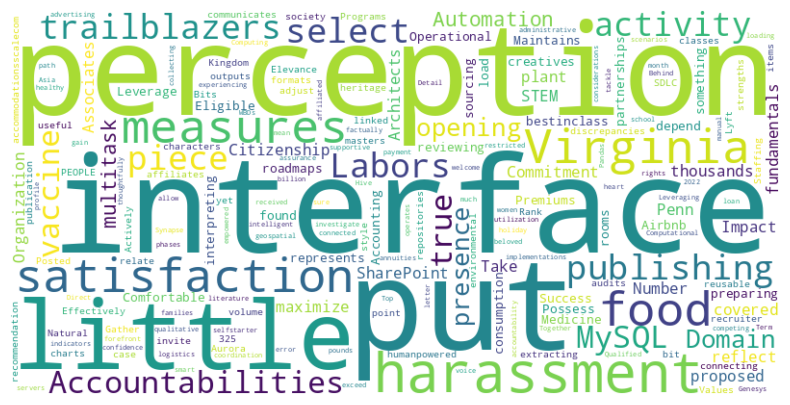

In [33]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

# 1. Combine all tokens into a single list
all_tokens = [token for sublist in df['Job_description'] for token in sublist]

# 2. Count the frequency of each token
word_frequencies = Counter(all_tokens)

# 3. Filter tokens based on frequency
# Keep tokens with frequency between 5 and 100
filtered_word_frequencies = {
    word: freq for word, freq in word_frequencies.items()
    if 5 <= freq <= 100
}

# 4. Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate_from_frequencies(filtered_word_frequencies)

# 5. Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

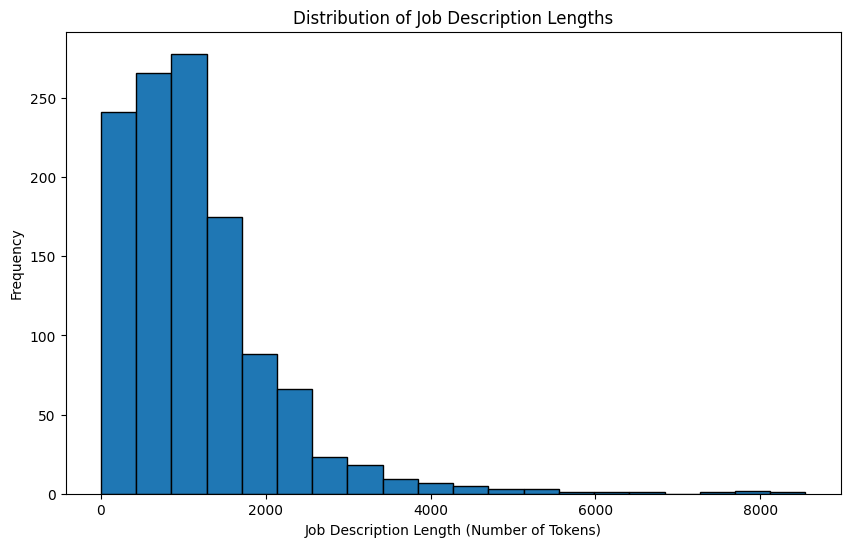

In [34]:
# 1. Calculate the length of each job description
df['job_description_length'] = df['Job_description'].apply(len)

# 2. Create a histogram of the job description lengths
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(df['job_description_length'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Job Description Lengths')
plt.xlabel('Job Description Length (Number of Tokens)')
plt.ylabel('Frequency')
plt.show()

In [35]:
df.columns


Index(['Job_title', 'Company_name', 'Location', 'Salary_fork', 'Rating',
       'Company_Overview', 'Job_description', 'Avg_base_salary',
       'Min_No_of_employees', 'Industry_Type', 'founded_year', 'Salary_Digits',
       'Average_Salary', 'Min_Salary', 'Max_Salary', 'job_description_length'],
      dtype='object')

In [36]:
df = df.drop(columns=['Salary_fork','Company_Overview','Avg_base_salary','Salary_Digits','job_description_length'])

In [37]:
df.columns

Index(['Job_title', 'Company_name', 'Location', 'Rating', 'Job_description',
       'Min_No_of_employees', 'Industry_Type', 'founded_year',
       'Average_Salary', 'Min_Salary', 'Max_Salary'],
      dtype='object')